# H4 Molecule: Constructing Potential Energy Surfaces Using VQE

## Step 1: Classical calculations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import *
import tequila as tq
threshold = 1e-6 #Cutoff for UCC MP2 amplitudes and QCC ranking gradients

basis = 'sto-3g'

#### Classical Electronic Structure Methods

In [2]:
bond_lengths = np.linspace(0.8,2.7,15)
#Run FCI
print("Full Configuration Interaction (FCI):")
FCI_PES = obtain_PES('h4', bond_lengths, basis, method='fci')
#Run HF
print("Hartree-Fock (HF):")
HF_PES = obtain_PES('h4', bond_lengths, basis,  method='hf')
#Run CCSD
print("Couple Cluster Singles and Doubles (CCSD):")
CCSD_PES = obtain_PES('h4', bond_lengths, basis,  method='ccsd')

E = -1.7282808647469823 Eh
E = -1.8757673115297755 Eh
E = -1.9436685341419828 Eh
E = -1.9681168701537448 Eh
E = -1.9688717505339302 Eh
E = -1.9575160224134387 Eh
E = -1.9411219627085186 Eh
E = -1.9240069218707847 Eh
E = -1.9086207863072835 Eh
E = -1.8960726556134395 Eh
E = -1.886551035526075 Eh
E = -1.8797113367238392 Eh
E = -1.8749960099801717 Eh
E = -1.8718427824231183 Eh
E = -1.8697821728146717 Eh
E = -1.6019400748311579 Eh
E = -1.7310111342440724 Eh
E = -1.7791045408794854 Eh
E = -1.7818090946447955 Eh
E = -1.7585910209903557 Eh
E = -1.720912463577959 Eh
E = -1.6758703418708207 Eh
E = -1.6279977412549318 Eh
E = -1.5802294832603316 Eh
E = -1.534445487370811 Eh
E = -1.4917887476436846 Eh
E = -1.452871269319548 Eh
E = -1.417928630268599 Eh
E = -1.3869439492023357 Eh
E = -1.3597425710619053 Eh
E = -1.730297072383129 Eh
E = -1.8787802508847058 Eh
E = -1.9481335329118727 Eh
E = -1.9745957353524388 Eh
E = -1.9780170268528454 Eh
E = -1.9698470785114277 Eh
E = -1.9566753319492105 Eh
E = -1.

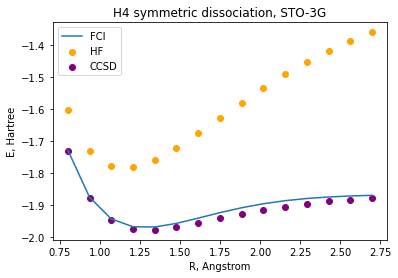

In [3]:
#Plot H4 PESs

plt.title('H4 symmetric dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()

## Step 2: Generating Qubit Hamiltonians

In [4]:
qubit_transf = 'jw' # Jordan-Wigner transformations
h4 = get_qubit_hamiltonian(mol='h4', geometry=1.5, basis='sto3g', qubit_transf=qubit_transf)
print(h4)

-0.8823205468513752 [] +
-0.034058385022492754 [X0 X1 Y2 Y3] +
-0.0340583850225138 [X0 X1 Y4 Y5] +
-0.023093664326494255 [X0 X1 Y6 Y7] +
0.034058385022492754 [X0 Y1 Y2 X3] +
0.0340583850225138 [X0 Y1 Y4 X5] +
0.023093664326494255 [X0 Y1 Y6 X7] +
-0.011573113480190935 [X0 Z1 X2 X4 Z5 X6] +
-0.035257520327649984 [X0 Z1 X2 X5 Z6 X7] +
-0.035257520327649984 [X0 Z1 X2 Y5 Z6 Y7] +
-0.011573113480190928 [X0 Z1 Y2 Y4 Z5 X6] +
0.03525752032764998 [X0 Z1 Z2 X3 Y4 Z5 Z6 Y7] +
0.023684406847459046 [X0 Z1 Z2 X3 X5 X6] +
-0.03525752032764998 [X0 Z1 Z2 Y3 Y4 Z5 Z6 X7] +
0.023684406847459046 [X0 Z1 Z2 Y3 Y5 X6] +
-4.046981332494459e-08 [X0 Z1 Z2 Z3 Z4 Z5 X6] +
0.034058385022492754 [Y0 X1 X2 Y3] +
0.0340583850225138 [Y0 X1 X4 Y5] +
0.023093664326494255 [Y0 X1 X6 Y7] +
-0.034058385022492754 [Y0 Y1 X2 X3] +
-0.0340583850225138 [Y0 Y1 X4 X5] +
-0.023093664326494255 [Y0 Y1 X6 X7] +
-0.011573113480190928 [Y0 Z1 X2 X4 Z5 Y6] +
-0.011573113480190935 [Y0 Z1 Y2 Y4 Z5 Y6] +
-0.035257520327649984 [Y0 Z1 Y2 X5 Z6 

In [5]:
h4_tapered = taper_hamiltonian(h4, n_spin_orbitals=8, n_electrons=4, qubit_transf=qubit_transf)
print("Effective Hamiltonian:", h4_tapered)

## Step 3: Unitary Ansatz

In [13]:
trotter_steps = 1

xyz_data = get_molecular_data('h4', geometry=1.5, xyz_format=True)
basis='sto-3g'

h4_tq = tq.quantumchemistry.Molecule(geometry=xyz_data, basis_set=basis)

print('Number of spin-orbitals (qubits): {} \n'.format(2*h4_tq.n_orbitals))

E_FCI = h4_tq.compute_energy(method='fci')

print('FCI energy: {}'.format(E_FCI))

Number of spin-orbitals (qubits): 8 

FCI energy: -1.9551250115194319


In [7]:
H = h4_tq.make_hamiltonian()

print("\nHamiltonian has {} terms\n".format(len(H)))

U_UCCSD = h4_tq.make_uccsd_ansatz(initial_amplitudes='MP2',threshold=threshold, trotter_steps=trotter_steps)

E = tq.ExpectationValue(H=H, U=U_UCCSD)

print('\nNumber of UCCSD amplitudes: {} \n'.format(len(E.extract_variables())))

print('\nStarting optimization:\n')

result = tq.minimize(objective=E, method="BFGS", initial_values={k:0.0 for k in E.extract_variables()}, tol=1e-6)

print('\nObtained UCCSD energy: {}'.format(result.energy))


Hamiltonian has 93 terms


Number of UCCSD amplitudes: 8 


Starting optimization:

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 512 expectationvalues

active variables : 8

E=-1.71399864  angles= {(3, 1, 2, 0): 0.0, (3, 0, 3, 0): 0.0, (2, 0, 3, 1): 0.0, (2, 1, 2, 1): 0.0, (3, 1, 3, 1): 0.0, (3, 0, 2, 1): 0.0, (2, 0, 2, 0): 0.0, (2, 1, 3, 0): 0.0}  samples= None
E=-1.11359858  angles= {(3, 1, 2, 0): -0.46722960472106934, (3, 0, 3, 0): -0.18474936485290527, (2, 0, 3, 1): -0.46722960472106934, (2, 1, 2, 1): -0.19438719749450684, (3, 1, 3, 1): -0.30623817443847656, (3, 0, 2, 1): -0.004305601119995117, (2, 0, 2, 0): -0.27246713638305664, (2, 1, 3, 0): -0.004305601119995117}  samples= None
E=-1.77345576  angles= {(3, 1, 2, 0): -0.07621729618876547, (3, 0, 3, 0): -0.030137424768035468, (2, 0, 

E=-1.95141279  angles= {(3, 1, 2, 0): -0.38455182486878614, (3, 0, 3, 0): -0.1269786287923016, (2, 0, 3, 1): -0.0900906141612565, (2, 1, 2, 1): -0.6712876460374243, (3, 1, 3, 1): -0.046943790301748764, (3, 0, 2, 1): -0.30887283601441906, (2, 0, 2, 0): -0.04661573163480531, (2, 1, 3, 0): -0.014899587073343485}  samples= None
E=-1.95142059  angles= {(3, 1, 2, 0): -0.40166294589413054, (3, 0, 3, 0): -0.12693943114466633, (2, 0, 3, 1): -0.07294607768726917, (2, 1, 2, 1): -0.6716044245087619, (3, 1, 3, 1): -0.04663338593309007, (3, 0, 2, 1): -0.29430447309777497, (2, 0, 2, 0): -0.04647242635388251, (2, 1, 3, 0): -0.028208570067069366}  samples= None
E=-1.95143374  angles= {(3, 1, 2, 0): -0.43560320013739745, (3, 0, 3, 0): -0.12688449943590868, (2, 0, 3, 1): -0.03925662633829094, (2, 1, 2, 1): -0.6721000195247547, (3, 1, 3, 1): -0.046164022379999496, (3, 0, 2, 1): -0.26710812617613783, (2, 0, 2, 0): -0.04624629487840726, (2, 1, 3, 0): -0.05354534377440031}  samples= None
E=-1.95145215  angle

E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785373365607, (3, 0, 3, 0): -0.1272361128937425, (2, 0, 3, 1): 0.3144194581928305, (2, 1, 2, 1): -0.671829421892599, (3, 1, 3, 1): -0.04680269815032662, (3, 0, 2, 1): 0.0018252183520068546, (2, 0, 2, 0): -0.04619779141851413, (2, 1, 3, 0): -0.3376324837697338}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785191867971, (3, 0, 3, 0): -0.1272361159002561, (2, 0, 3, 1): 0.3144194015279102, (2, 1, 2, 1): -0.6718294173028075, (3, 1, 3, 1): -0.04680269851299424, (3, 0, 2, 1): 0.0018250493509437307, (2, 0, 2, 0): -0.04619779077669074, (2, 1, 3, 0): -0.3376323189343029}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785191937527, (3, 0, 3, 0): -0.1272361158991039, (2, 0, 3, 1): 0.3144194015496257, (2, 1, 2, 1): -0.6718294173045665, (3, 1, 3, 1): -0.046802698512855255, (3, 0, 2, 1): 0.0018250494157095063, (2, 0, 2, 0): -0.046197790776936705, (2, 1, 3, 0): -0.33763231899747226}  samples= None
E=-1.95156585  angles= {(3, 1, 2

E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785192015415, (3, 0, 3, 0): -0.1272361158978137, (2, 0, 3, 1): 0.3144194015739431, (2, 1, 2, 1): -0.6718294173065361, (3, 1, 3, 1): -0.04680269851269962, (3, 0, 2, 1): 0.001825049488235193, (2, 0, 2, 0): -0.04619779077721214, (2, 1, 3, 0): -0.3376323190682103}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785192369401, (3, 0, 3, 0): -0.12723611589194989, (2, 0, 3, 1): 0.31441940168446025, (2, 1, 2, 1): -0.671829417315488, (3, 1, 3, 1): -0.046802698511992286, (3, 0, 2, 1): 0.0018250498178484869, (2, 0, 2, 0): -0.04619779077846393, (2, 1, 3, 0): -0.3376323193896991}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785192015415, (3, 0, 3, 0): -0.1272361158978137, (2, 0, 3, 1): 0.31441940157394316, (2, 1, 2, 1): -0.6718294173065361, (3, 1, 3, 1): -0.04680269851269962, (3, 0, 2, 1): 0.0018250494882352758, (2, 0, 2, 0): -0.04619779077721214, (2, 1, 3, 0): -0.3376323190682104}  samples= None
E=-1.95156585  angles= {(3, 1, 2

E=-1.95156585  angles= {(3, 1, 2, 0): -0.804378519211169, (3, 0, 3, 0): -0.1272361158962189, (2, 0, 3, 1): 0.3144194016040008, (2, 1, 2, 1): -0.6718294173089708, (3, 1, 3, 1): -0.04680269851250724, (3, 0, 2, 1): 0.0018250495778811473, (2, 0, 2, 0): -0.046197790777552594, (2, 1, 3, 0): -0.3376323191556466}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785192111517, (3, 0, 3, 0): -0.12723611589622175, (2, 0, 3, 1): 0.3144194016039468, (2, 1, 2, 1): -0.6718294173089664, (3, 1, 3, 1): -0.04680269851250759, (3, 0, 2, 1): 0.0018250495777202033, (2, 0, 2, 0): -0.04619779077755198, (2, 1, 3, 0): -0.33763231915548964}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043785192111603, (3, 0, 3, 0): -0.12723611589622033, (2, 0, 3, 1): 0.3144194016039738, (2, 1, 2, 1): -0.6718294173089686, (3, 1, 3, 1): -0.046802698512507415, (3, 0, 2, 1): 0.0018250495778006754, (2, 0, 2, 0): -0.04619779077755229, (2, 1, 3, 0): -0.33763231915556813}  samples= None
E=-1.95156585  angles= {(3, 1

E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043818125923055, (3, 0, 3, 0): -0.12723601875219462, (2, 0, 3, 1): 0.31442333520744864, (2, 1, 2, 1): -0.6718295912213633, (3, 1, 3, 1): -0.046802668828222004, (3, 0, 2, 1): 0.0018276280874155563, (2, 0, 2, 0): -0.04619780135029969, (2, 1, 3, 0): -0.3376351744148184}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043817056918409, (3, 0, 3, 0): -0.12723601930391634, (2, 0, 3, 1): 0.31442322561780195, (2, 1, 2, 1): -0.6718295922352538, (3, 1, 3, 1): -0.04680266855754364, (3, 0, 2, 1): 0.0018275528290507173, (2, 0, 2, 0): -0.04619780017767553, (2, 1, 3, 0): -0.3376350909369768}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.804381705698806, (3, 0, 3, 0): -0.1272360193038804, (2, 0, 3, 1): 0.3144232256249423, (2, 1, 2, 1): -0.6718295922351878, (3, 1, 3, 1): -0.04680266855756128, (3, 0, 2, 1): 0.0018275528339541948, (2, 0, 2, 0): -0.046197800177751935, (2, 1, 3, 0): -0.33763509094241584}  samples= None
E=-1.95156585  angles= {(3, 

E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043817057023537, (3, 0, 3, 0): -0.1272360193038621, (2, 0, 3, 1): 0.3144232256285792, (2, 1, 2, 1): -0.6718295922351541, (3, 1, 3, 1): -0.04680266855757026, (3, 0, 2, 1): 0.0018275528364517977, (2, 0, 2, 0): -0.046197800177790856, (2, 1, 3, 0): -0.3376350909451862}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043817059111085, (3, 0, 3, 0): -0.1272360193027847, (2, 0, 3, 1): 0.3144232258425854, (2, 1, 2, 1): -0.6718295922331742, (3, 1, 3, 1): -0.046802668558098844, (3, 0, 2, 1): 0.0018275529834160132, (2, 0, 2, 0): -0.046197800180080746, (2, 1, 3, 0): -0.3376350911082014}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043817057023537, (3, 0, 3, 0): -0.1272360193038621, (2, 0, 3, 1): 0.3144232256285792, (2, 1, 2, 1): -0.6718295922351541, (3, 1, 3, 1): -0.04680266855757026, (3, 0, 2, 1): 0.0018275528364518066, (2, 0, 2, 0): -0.046197800177790856, (2, 1, 3, 0): -0.3376350909451862}  samples= None
E=-1.95156585  angles= {(3, 1,

E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043817057306906, (3, 0, 3, 0): -0.12723601930371584, (2, 0, 3, 1): 0.3144232256576289, (2, 1, 2, 1): -0.6718295922348854, (3, 1, 3, 1): -0.046802668557642015, (3, 0, 2, 1): 0.0018275528564010613, (2, 0, 2, 0): -0.04619780017810169, (2, 1, 3, 0): -0.33763509096731426}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043817057307161, (3, 0, 3, 0): -0.12723601930371572, (2, 0, 3, 1): 0.31442322565765507, (2, 1, 2, 1): -0.6718295922348851, (3, 1, 3, 1): -0.04680266855764208, (3, 0, 2, 1): 0.0018275528564190011, (2, 0, 2, 0): -0.04619780017810197, (2, 1, 3, 0): -0.33763509096733413}  samples= None
E=-1.95156585  angles= {(3, 1, 2, 0): -0.8043817057306906, (3, 0, 3, 0): -0.12723601930371584, (2, 0, 3, 1): 0.3144232256576289, (2, 1, 2, 1): -0.6718295922348854, (3, 1, 3, 1): -0.046802668557642015, (3, 0, 2, 1): 0.0018275528564010613, (2, 0, 2, 0): -0.04619780017810169, (2, 1, 3, 0): -0.33763509096731426}  samples= None
E=-1.95156585  angles= {(

## Step 4: Measurement

In [135]:
comm_groups = get_commuting_group(h4)
print('Number of mutually commuting fragments: {}'.format(len(comm_groups)))
print('The first commuting group')
print(comm_groups[1])

Number of mutually commuting fragments: 4
The first commuting group
-0.8823205468513752 [] +
0.034058385022492754 [X0 Y1 Y2 X3] +
0.0340583850225138 [X0 Y1 Y4 X5] +
-0.035257520327649984 [X0 Z1 X2 Y5 Z6 Y7] +
0.03525752032764998 [X0 Z1 Z2 X3 Y4 Z5 Z6 Y7] +
0.034058385022492754 [Y0 X1 X2 Y3] +
0.0340583850225138 [Y0 X1 X4 Y5] +
-0.035257520327649984 [Y0 Z1 Y2 X5 Z6 X7] +
0.03525752032764998 [Y0 Z1 Z2 Y3 X4 Z5 Z6 X7] +
0.03525752032764998 [X1 X2 Y5 Y6] +
-0.035257520327649984 [X1 Z2 X3 Y4 Z5 Y6] +
0.03525752032764998 [Y1 Y2 X5 X6] +
-0.035257520327649984 [Y1 Z2 Y3 X4 Z5 X6] +
0.03827976789253185 [X2 Y3 Y6 X7] +
0.03827976789253185 [Y2 X3 X6 Y7] +
0.03827976789251076 [X4 Y5 Y6 X7] +
0.03827976789251076 [Y4 X5 X6 Y7]


In [136]:
uqwc = get_qwc_unitary(comm_groups[1])
print('This is unitary, U * U^+ = I ')
print(uqwc * uqwc)

This is unitary, U * U^+ = I 
(0.9999999999999999+0j) []


In [137]:
qwc = remove_complex(uqwc * comm_groups[1] * uqwc)
print(qwc)

-0.8823205468513686 [] +
-0.035257520327649845 [X0 X1 X2 Z3 Z7] +
0.035257520327649845 [X0 X1 X2 Z5 Z7] +
-0.034058385022492796 [X0 Z3] +
-0.03405838502251355 [X0 Z5] +
-0.034058385022492796 [X1 X2 Z3] +
-0.035257520327649845 [X1 X2 Z3 X4 Z7] +
-0.035257520327649845 [X1 X2 Z3 Z6] +
0.035257520327649845 [X1 X2 Z5 Z6] +
-0.03405838502251355 [X1 X4 Z5] +
0.035257520327649845 [X1 Z5 Z7] +
-0.035257520327649845 [X2 Z3 X4 Z6] +
0.038279767892531756 [X2 Z3 Z6 Z7] +
0.038279767892531756 [Z3 Z6 Z7] +
0.038279767892510815 [X4 Z5 Z6 Z7] +
0.035257520327649845 [Z5 Z6] +
0.038279767892510815 [Z5 Z6 Z7]


In [138]:
uz = get_zform_unitary(qwc)
print("Checking whether U * U^+ is identity: {}".format(uz * uz))

allz = remove_complex(uz * qwc * uz)
print("\nThe all-z form of qwc fragment:\n{}".format(allz))

Checking whether U * U^+ is identity: 0.9999999999999996 []

The all-z form of qwc fragment:
-0.8823205468513678 [] +
-0.035257520327649824 [Z0 Z1 Z2 Z3 Z7] +
0.035257520327649824 [Z0 Z1 Z2 Z5 Z7] +
-0.03405838502249276 [Z0 Z3] +
-0.03405838502251352 [Z0 Z5] +
-0.03405838502249276 [Z1 Z2 Z3] +
-0.035257520327649824 [Z1 Z2 Z3 Z4 Z7] +
-0.035257520327649824 [Z1 Z2 Z3 Z6] +
0.035257520327649824 [Z1 Z2 Z5 Z6] +
-0.03405838502251352 [Z1 Z4 Z5] +
0.035257520327649824 [Z1 Z5 Z7] +
-0.035257520327649824 [Z2 Z3 Z4 Z6] +
0.03827976789253173 [Z2 Z3 Z6 Z7] +
0.03827976789253173 [Z3 Z6 Z7] +
0.03827976789251079 [Z4 Z5 Z6 Z7] +
0.035257520327649824 [Z5 Z6] +
0.03827976789251079 [Z5 Z6 Z7]


## Step 5: Circuits

In [30]:
hf_reference = hf_occ(2*h4_tq.n_orbitals, h4_tq.n_electrons)

#Define number of entanglers to enter ansatz
n_ents = 1

#Rank entanglers using energy gradient criterion
ranked_entangler_groupings = generate_QCC_gradient_groupings(H.to_openfermion(), 
                                                             2*h4_tq.n_orbitals, 
                                                             hf_reference, 
                                                             cutoff=threshold)

print('Grouping gradient magnitudes (Grouping : Gradient magnitude):')
for i in range(len(ranked_entangler_groupings)):
    print('{} : {}'.format(i+1,ranked_entangler_groupings[i][1]))


entanglers = get_QCC_entanglers(ranked_entangler_groupings, n_ents, 2*h4_tq.n_orbitals)

print('\nSelected entanglers:')
for ent in entanglers:
    print(ent)

Grouping gradient magnitudes (Grouping : Gradient magnitude):
1 : 0.1575
2 : 0.1492
3 : 0.1492
4 : 0.1435
5 : 0.1135
6 : 0.1117
7 : 0.1117
8 : 0.11
9 : 0.0375
10 : 0.0375

Selected entanglers:
1.0 [X2 Y3 X6 X7]


In [107]:
#Mean-field part of U (Omega):    
U_MF = construct_QMF_ansatz(n_qubits = 2*h4_tq.n_orbitals)
#Entangling part of U:
U_ENT = construct_QCC_ansatz(entanglers)

U_QCC = U_MF + U_ENT

E = tq.ExpectationValue(H=H, U=U_QCC)

initial_vals = init_qcc_params(hf_reference, E.extract_variables())

#Minimize wrt the entangler amplitude and MF angles:
result = tq.minimize(objective=E, method="BFGS", initial_values=initial_vals, tol=1.e-6)

print('\nObtained QCC energy ({} entanglers): {}'.format(len(entanglers), result.energy))

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 34 expectationvalues

active variables : 17

E=-1.54125526  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.141592653589793, gamma_2: 0.0, beta_3: 3.141592653589793, gamma_3: 0.0, beta_4: 0.0, gamma_4: 0.0, beta_5: 0.0, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, tau_0: 0.0}  samples= None
E=-1.56411492  angles= {beta_0: 3.141592653589793, gamma_0: 0.0, beta_1: 3.141592653589793, gamma_1: 0.0, beta_2: 3.141592653589793, gamma_2: 0.0, beta_3: 3.141592653589793, gamma_3: 0.0, beta_4: 0.0, gamma_4: 0.0, beta_5: 0.0, gamma_5: 0.0, beta_6: 0.0, gamma_6: 0.0, beta_7: 0.0, gamma_7: 0.0, tau_0: 0.15751802921295166}  samples= None
E=-1.59894352  angles= {beta_0: 3.1415926535897

In [110]:
H = tq.QubitHamiltonian.from_openfermion(get_qubit_hamiltonian('h4', 2, 'sto-3g', qubit_transf='jw'))
print("entanglers", entanglers)
print(construct_QCC_ansatz(entanglers))

a = tq.Variable("tau_0")
print("a:", a)
U = construct_QMF_ansatz(8)
#hardcoding the entanglers
U += tq.gates.ExpPauli(paulistring=tq.PauliString.from_string("X(2)Y(3)X(6)X(7)"), angle=a)
print(U)

entanglers [1.0 [X2 Y3 X6 X7]]
circuit: 
Exp-Pauli(target=(2, 3, 6, 7), control=(), parameter=tau_0, paulistring=X(2)Y(3)X(6)X(7))

a: tau_0
circuit: 
Rx(target=(0,), parameter=beta_0)
Rz(target=(0,), parameter=gamma_0)
Rx(target=(1,), parameter=beta_1)
Rz(target=(1,), parameter=gamma_1)
Rx(target=(2,), parameter=beta_2)
Rz(target=(2,), parameter=gamma_2)
Rx(target=(3,), parameter=beta_3)
Rz(target=(3,), parameter=gamma_3)
Rx(target=(4,), parameter=beta_4)
Rz(target=(4,), parameter=gamma_4)
Rx(target=(5,), parameter=beta_5)
Rz(target=(5,), parameter=gamma_5)
Rx(target=(6,), parameter=beta_6)
Rz(target=(6,), parameter=gamma_6)
Rx(target=(7,), parameter=beta_7)
Rz(target=(7,), parameter=gamma_7)
Exp-Pauli(target=(2, 3, 6, 7), control=(), parameter=tau_0, paulistring=X(2)Y(3)X(6)X(7))



In [114]:
E = tq.ExpectationValue(H=H, U=U)
vars = {'beta_0': 3.141592653589793, 'gamma_0': 0.0, 'beta_1': 3.141592653589793, 'gamma_1': 0.0, 'beta_2': 3.141592542000603, 'gamma_2': 0.0, 'beta_3': 3.141592542000603, 'gamma_3': 0.0, 'beta_4': 0.0, 'gamma_4': 0.0, 'beta_5': 0.0, 'gamma_5': 0.0, 'beta_6': 0.0, 'gamma_6': 0.0, 'beta_7': 0.0, 'gamma_7': 0.0, 'tau_0': 0.8117964996241631} # values obtained from step 3
print(tq.simulate(E, variables=vars))

-1.6089507283119502


In [133]:
from qiskit import IBMQ
IBMQ.save_account('6f1ae0f74f3b670c62a6a7427dc22eb12f9d6eaa47e5d264218990c42e2593d029d53a92ee9260ce05f0daf11d87a8b1a1114637c90ae648bfabeddca94ae087')
#IBMQ.enable_account('6f1ae0f74f3b670c62a6a7427dc22eb12f9d6eaa47e5d264218990c42e2593d029d53a92ee9260ce05f0daf11d87a8b1a1114637c90ae648bfabeddca94ae087')

configrc.store_credentials:WARNING:2020-07-18 20:28:13,276: Credentials already present. Set overwrite=True to overwrite.


In [134]:
# list of devices available can be found in ibmq account page
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_qasm_simulator')
tq.simulate(E, variables=vars, samples=100, backend="qiskit", device=device)#,qiskit_provider = provider) 

KeyboardInterrupt: 

In [104]:
#draw
circ = tq.circuit.compiler.compile_exponential_pauli_gate(U)
tq.draw(circ, backend="qiskit")

      ┌────────────────────┐┌─────────────────────┐                            »
q_0: ─┤ RX(f((beta_0,))_0) ├┤ RZ(f((gamma_0,))_1) ├────────────────────────────»
      ├────────────────────┤├─────────────────────┤                            »
q_1: ─┤ RX(f((beta_1,))_2) ├┤ RZ(f((gamma_1,))_3) ├────────────────────────────»
      ├────────────────────┤├─────────────────────┤    ┌───┐                   »
q_2: ─┤ RX(f((beta_2,))_4) ├┤ RZ(f((gamma_2,))_5) ├────┤ H ├──────■────────────»
      ├────────────────────┤├─────────────────────┤ ┌──┴───┴───┐┌─┴─┐          »
q_3: ─┤ RX(f((beta_3,))_6) ├┤ RZ(f((gamma_3,))_7) ├─┤ RX(pi/2) ├┤ X ├──■───────»
      ├────────────────────┤├─────────────────────┤ └──────────┘└───┘  │       »
q_4: ─┤ RX(f((beta_4,))_8) ├┤ RZ(f((gamma_4,))_9) ├────────────────────┼───────»
     ┌┴────────────────────┤├─────────────────────┴┐                   │       »
q_5: ┤ RX(f((beta_5,))_10) ├┤ RZ(f((gamma_5,))_11) ├───────────────────┼───────»
     ├─────────────────────┤